<a href="https://colab.research.google.com/github/keerthipriyaa029/Sentimental-Analysis-on-Web-Scraped-Dynamic-Stock-News-Data/blob/main/Sentimental_Analysis_on_Web_Scraped_Dynamic_Stock_News_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentimental Analysis on Web Scraped Dynamic Stock News Data**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Define the base URL and headers for the request
Finviz_url = 'https://finviz.com/quote.ashx?t='
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

# List of stock tickers to scrape data for
tickers = ['AAPL', 'TSLA', 'GOOGL']  # Example tickers

# Dictionary to store news tables for each ticker
news_tables = {}

# Loop through each ticker and fetch the news data
for ticker in tickers:
    url = Finviz_url + ticker
    response = requests.get(url, headers=headers)
    html = BeautifulSoup(response.content, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

# List to store parsed data
parsed_data = []

# Parse the news data for each ticker
for ticker, news_table in news_tables.items():
    if news_table:  # Check if the news_table exists
        for row in news_table.findAll('tr'):
            # Check if the <a> tag exists in the row
            if row.a:
                title = row.a.text
            else:
                title = None

            # Check for date and time in the row
            date_time = row.td.text.strip()

            if ' ' in date_time:
                date, time = date_time.split(' ')
            else:
                # If only time is available, date might be the same as the previous row
                time = date_time
                date = None  # Initialize date as None

            # If date is None (meaning it was only a time), use the last known date
            if not date:
                last_date = parsed_data[-1][1] if parsed_data else None
                date = last_date

            parsed_data.append([ticker, date, time, title])

# Convert parsed data into a DataFrame
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

# Remove rows where 'title' is None or empty
df = df[df['title'].notna() & df['title'].str.strip().astype(bool)]

# Display the DataFrame
df.head()



,ticker,date,time,title
0,AAPL,Today,04:18AM,"5 big analyst AI moves: Buy Nvidia pullback, A..."
1,AAPL,Aug-31-24,10:47PM,Enovix Corporation (ENVX): High Operating Expe...
2,AAPL,Aug-31-24,10:42PM,"Microvision, Inc. (MVIS): Cash Burn and Revenu..."
3,AAPL,Aug-31-24,10:40PM,"InterDigital, Inc. (IDCC): Legal Challenges an..."
4,AAPL,Aug-31-24,09:30PM,Vuzix Corporation (VUZI): High Costs and Reven...


In [ ]:
!pip install nltk # install nltk
import nltk # import nltk
nltk.download('vader_lexicon')
# Initialize the VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Ensure there are no None values in the 'title' column
df['title'] = df['title'].fillna('')

# Function to classify the sentiment based on compound score
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the VADER sentiment analysis to the title and add a 'compound' score column
df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])

# Classify the sentiment based on the compound score
df['sentiment'] = df['compound'].apply(classify_sentiment)

# Convert the date to a datetime object for grouping
df['date'] = df['date'].replace('Today', pd.to_datetime('today').strftime('%b-%d-%y'))
df['date'] = pd.to_datetime(df['date']).dt.date

# Display the first 50 rows of the DataFrame
df[['ticker', 'date', 'time', 'title', 'sentiment']].head(50)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-5-2c472d7fc26f>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date


,ticker,date,time,title,sentiment
0,AAPL,2024-08-31,10:47PM,Enovix Corporation (ENVX): High Operating Expe...,negative
1,AAPL,2024-08-31,10:42PM,"Microvision, Inc. (MVIS): Cash Burn and Revenu...",negative
2,AAPL,2024-08-31,10:40PM,"InterDigital, Inc. (IDCC): Legal Challenges an...",neutral
3,AAPL,2024-08-31,09:30PM,Vuzix Corporation (VUZI): High Costs and Reven...,negative
4,AAPL,2024-08-31,09:07PM,"eXp World Holdings, Inc. (EXPI): Declining Ear...",negative
5,AAPL,2024-08-31,09:04PM,"Super Micro Computer, Inc. (SMCI): Rising CapE...",positive
6,AAPL,2024-08-31,08:46PM,"Etsy, Inc. (ETSY): AR Expansion Fails to Count...",negative
7,AAPL,2024-08-31,08:40PM,Xerox Holdings Corporation (XRX): AR Ambitions...,negative
8,AAPL,2024-08-31,08:21PM,Williams-Sonoma Inc. (WSM)'s AR Push: A Risky ...,negative
9,AAPL,2024-08-31,08:18PM,Immersion Corporation (IMMR): A Risky AR Inves...,negative


<Figure size 1000x800 with 0 Axes>

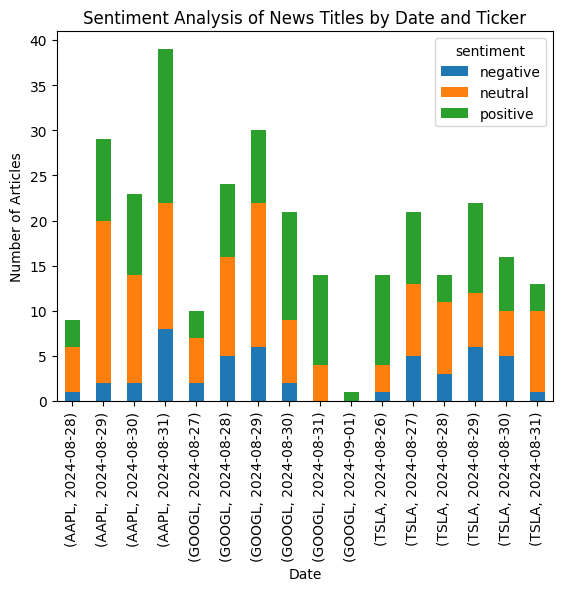

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
mean_df = df.groupby(['ticker', 'date', 'sentiment']).size().unstack(fill_value=0)
mean_df.plot(kind='bar', stacked=True)
plt.title('Sentiment Analysis of News Titles by Date and Ticker')
plt.ylabel('Number of Articles')
plt.xlabel('Date')
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/drive/My Drive/Web Scraped files DL/stock_news_sentiment.csv', index=False)
print("Filtered headlines and sentiments saved to /content/drive/My Drive/Web Scraped files DL/stock_news_sentiment.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Filtered headlines and sentiments saved to /content/drive/My Drive/Web Scraped files DL/stock_news_sentiment.csv
